In [1]:

import os
import pandas as pd

home = os.environ["HOME"]
os.chdir(f"{home}/tiniMLVM")
sensor_data_folder = "smart_city/spire_2024.csv"
df = pd.read_csv(sensor_data_folder, sep=";")

#get max value of chiave
max_value = df["chiave"].max()
print(max_value)

df.head()

1016


,data,codice_spira,00_00_01_00,01_00_02_00,02_00_03_00,03_00_04_00,04_00_05_00,05_00_06_00,06_00_07_00,07_00_08_00,...,ordinanza,stato,codimpsem,direzione,angolo,longitudine,latitudine,geopoint,chiave,num_giorno_settimana
0,2024-01-12,3.52 3.25 8 1,211,99,58,36,69,143,270,952,...,4000/343434,A,143,E,258,11.341744,44.505350,"44.5053500470034, 11.3417436594088",643,Venerdì
1,2024-01-12,3.54 3.33 7 1,59,28,18,11,20,29,96,379,...,4000/343434,A,263,SE,242,11.350931,44.502954,"44.502954297571, 11.3509310151717",647,Venerdì
2,2024-01-12,3.54 3.33 8 1,205,94,70,45,76,108,210,626,...,4000/343434,A,263,SE,240,11.350915,44.502934,"44.5029340213656, 11.3509146910634",648,Venerdì
3,2024-01-12,3.59 0.127 8 1,72,45,17,13,19,61,157,488,...,4000/343434,A,397,NaN,261,11.337749,44.508007,"44.5080073889109, 11.3377493153562",650,Venerdì
4,2024-01-12,3.68 3.36 6 1,61,49,27,24,31,55,135,377,...,4000/343434,A,376,NE,300,11.384497,44.511512,"44.5115119632077, 11.3844966594673",658,Venerdì


In [2]:
# !sudo apt install texlive-fonts-recommended texlive-fonts-extra cm-super -y
# !sudo apt install dvipng -y
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

def set_color_map(plt, cm: str) -> bool:
    """
    Sets the colormap for the specified plot:
        - https://matplotlib.org/stable/tutorials/colors/colormaps.html
    """
    # to change default color cycle
    plt.rcParams["image.cmap"] = cm
    colormaps = plt.cm.__dict__
    if cm in colormaps:
        plt.rcParams["axes.prop_cycle"] = plt.cycler(color=colormaps[cm].colors)
        return True
    else:
        return False
    
set_color_map(plt, "Set2")

plt.rcParams.update(
    {
        "pgf.texsystem": "pdflatex",
        "font.family": "Times New Roman",
        "font.serif": "Computer Modern Roman",
        "text.usetex": True,
        "pgf.rcfonts": False,
        "font.size": 20,
    }
)
use_pgf = True
plt.rcParams["text.usetex"] = True
plt.rcParams["figure.figsize"] = (8,5)

In [49]:
#get df accuracy 

accuracy_data_folder = "smart_city/accuracy_spire_2024.csv"
df_accuracy = pd.read_csv(accuracy_data_folder, sep=";")

df_accuracy.head()

,data_2,codice_spira_2,00_00_01,01_00_02,02_00_03,03_00_04,04_00_05,05_00_06,06_00_07,07_00_08,...,14_00_15,15_00_16,16_00_17,17_00_18,18_00_19,19_00_20,20_00_21,21_00_22,22_00_23,23_00_24
0,2024-05-01,0.127 1.3 2 1,100%,100%,100%,100%,91%,100%,100%,100%,...,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
1,2024-05-01,0.127 1.4 2 1,100%,100%,100%,100%,100%,100%,100%,100%,...,100%,100%,100%,100%,100%,91%,100%,91%,100%,100%
2,2024-05-01,0.127 1.5 5 1,100%,100%,100%,100%,100%,100%,100%,100%,...,100%,91%,100%,100%,100%,100%,100%,91%,100%,100%
3,2024-05-01,0.127 1.5 8 1,100%,100%,91%,91%,83%,100%,83%,100%,...,100%,91%,83%,100%,100%,83%,100%,91%,100%,100%
4,2024-05-01,0.127 1.16 2 1,100%,100%,100%,100%,100%,100%,100%,58%,...,75%,58%,58%,75%,41%,100%,100%,100%,100%,100%


In [35]:
print(df.columns)

Index(['data', 'codice_spira', '00_00_01_00', '01_00_02_00', '02_00_03_00',
       '03_00_04_00', '04_00_05_00', '05_00_06_00', '06_00_07_00',
       '07_00_08_00', '08_00_09_00', '09_00_10_00', '10_00_11_00',
       '11_00_12_00', '12_00_13_00', '13_00_14_00', '14_00_15_00',
       '15_00_16_00', '16_00_17_00', '17_00_18_00', '18_00_19_00',
       '19_00_20_00', '20_00_21_00', '21_00_22_00', '22_00_23_00',
       '23_00_24_00', 'id_uni', 'livello', 'tipologia', 'codice',
       'codice_arco', 'codice_via', 'nome_via', 'nodo_da', 'nodo_a',
       'ordinanza', 'stato', 'codimpsem', 'direzione', 'angolo', 'longitudine',
       'latitudine', 'geopoint', 'chiave', 'num_giorno_settimana'],
      dtype='object')


In [2]:
#get a spire key and save all his values at rows in a file
import numpy as np 

def get_distance(lat1, lon1, lat2, lon2):
    r = 6371  # Radius of the earth in km

    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = r * c  # Distance in km
    return distance

def get_spire_key_values(key,position_range, distance_max,df):
    spire_key = df[df["chiave"] == key]

    if spire_key.empty:
        return 0

    position = spire_key["geopoint"].values[0]

    position = [float(i) for i in position.split(",")]

    #check if the position is in the range
    distance = get_distance(position[0], position[1], position_range[0], position_range[1])

    if distance > distance_max:
        return 0

    #drop the non 2 to 25 columns 
    columns_keep = [df.columns[i] for i in range(2, 26)]
    spire_key = spire_key[columns_keep]
    #stack the columns in a single column
    spire_key = spire_key.stack()
    #append the values to a file of the same key

    # with open(f"sensor_manager/sensor_data/spire_{key}_{position}.csv", "a") as f:
    #     spire_key.to_csv(f, index=False, header=False)

    #check length of the file
    if len(spire_key) < 8000:
        return 0
        
    spire_key.to_csv(f"sensor_manager/sensor_data/spire_{key}_{position}.csv", index=False, header=False) #8713

    return 1

i= 0
count = 0
number = 160
list_keys = []
bologna_position = [44.494887, 11.342616]
while count < number and i < int(max_value):
    i += 1
    if i == 3:
        continue
    adding = get_spire_key_values(i, bologna_position, 1, df)
    count += adding
    if adding:
        list_keys.append(i)

print(count)


69


In [3]:
# print on the map the position of the sensors

import folium

m = folium.Map(location=[44.49381, 11.33875], zoom_start=15)

radius = 150


colors = []
for i in range(number):
    color = [np.random.randint(0, 255) for i in range(3)]
    #transform values to hex
    color = f"#{color[0]:02x}{color[1]:02x}{color[2]:02x}"
    colors.append(color)


for j,i in enumerate(list_keys):
    # color = colors[j]
    color = "red"
    spire_key = df[df["chiave"] == i]

    position = spire_key["geopoint"].values[0]
    position = [float(i) for i in position.split(",")]
    

    folium.Marker(
        location=position,
        icon=folium.Icon(color='blue', icon='4')
    ).add_to(m)

     #marker with number
    folium.Marker(
        location=position,
        icon = folium.DivIcon(
            icon_size=(150,36),
            icon_anchor=(7,20),
            html=f'<div style="font-size: 18pt; color: {color}">{i}</div>',
            )
        ).add_to(m)

   
    

    folium.Circle(
        radius=radius,
        location=position,
        color="blue",
        fill=False,
        line_cap='round',
    ).add_to(m)

    # folium.Circle(
    #     radius=40,
    #     location=position,
    #     color="black",
    #     fill=False,
    #     line_cap='round',
    # ).add_to(m)

#connect sensors with a line if they are inside the range

connected_spires = set([])

for i in range(len(list_keys)):
    for j in range(i+1, len(list_keys)):
        spire_key1 = df[df["chiave"] == list_keys[i]]
        spire_key2 = df[df["chiave"] == list_keys[j]]

        position1 = spire_key1["geopoint"].values[0]
        position1 = [float(i) for i in position1.split(",")]

        position2 = spire_key2["geopoint"].values[0]
        position2 = [float(i) for i in position2.split(",")]

        distance = get_distance(position1[0], position1[1], position2[0], position2[1])

        if distance < radius*1e-3:
            folium.PolyLine([position1, position2], color="black").add_to(m)
            connected_spires.add(list_keys[i])
            connected_spires.add(list_keys[j])

#delete non connected spires
non_connected_spires = set(list_keys) - connected_spires
import os
list_files = os.listdir("sensor_manager/sensor_data")
for i in non_connected_spires:
    for file in list_files:
        if f"spire_{i}" in file:
            os.remove(f"sensor_manager/sensor_data/{file}")
list_keys = list(connected_spires)


m

In [4]:
#count number of checks done, number of drifts and their type

import matplotlib.pyplot as plt

data_manager_folder = "sensor_manager/manager_data/"
label_attack = "no_attack"

number_of_checks = 0
anomalous_drifts = 0
systematic_drifts = 0

local_pvalues = []
systematic_pvalues = []

#dataframe with labels
df_labels = pd.DataFrame(columns=["spire","period", "label"])

for spire in list_keys:
    #read file
    with open(f"{data_manager_folder}output_{spire}.txt", "r") as f:
        lines = f.readlines()

    new_row = None
    for line in lines:
        
        period = line.split("period = ")[-1].split(",")[0]

        if "Local" in line:
            anomalous_drifts += 1
            number_of_checks += 1
            local_pvalues.append(float(line.split("=")[-1]))

            new_row = {"spire": spire, "label": "anomalous", "period": period}

        if "Systematic" in line:
            systematic_drifts += 1
            number_of_checks += 1
            systematic_pvalues.append(float(line.split("=")[-1]))

            new_row = {"spire": spire, "label": "systematic", "period": period}

        if "No" in line:
            number_of_checks += 1

            new_row = {"spire": spire, "label": "no_drift", "period": period}
        
        if new_row != None:
            df_labels = pd.concat([df_labels, pd.DataFrame([new_row])], ignore_index=True)
            new_row = None
    number_of_drifts = anomalous_drifts + systematic_drifts

print(f"Number of checks: {number_of_checks}")
print(f"Number of drifts: {number_of_drifts}")
print(f"Number of anomalous drifts: {anomalous_drifts}")
print(f"Number of systematic drifts: {systematic_drifts}")

#print percentage of dirfts 

if number_of_checks != 0:
    #percentage of drifts
    print(f"Percentage of drifts: {number_of_drifts/number_of_checks*100:.2f}%")
    print(f"Percentage of anomalous drifts: {anomalous_drifts/number_of_drifts*100:.2f}%")


#save the df_labels to a file

# df_labels.to_csv(f"./sensor_manager/{label_attack}.csv", index=False)
# df_labels.to_csv(f"./sensor_manager/labels.csv", index=False)


FileNotFoundError: [Errno 2] No such file or directory: 'sensor_manager/manager_data/output_384.txt'

In [ ]:
#check errors from labels to attack_1
# label_attack = "attack_2_4"

df_labels = pd.read_csv("./sensor_manager/attack_0.csv")
df_attack = pd.read_csv(f"./sensor_manager/{label_attack}.csv")


#check if attacks are labeled as anomalous

df_attack_labels = pd.read_csv("./sensor_manager/sintetic_data/attacks.csv", names=["spire", "label"])


#gather differences from the two dataframes
number_of_differences = 0
number_of_checks = len(df_labels)

for spire in list_keys:
    label = df_labels[df_labels["spire"] == spire]["label"].values

    attacked_values = df_attack[df_attack["spire"] == spire]["label"].values

    # if len(label) != 2:
    #     print(f"Spire {spire} has not 2 labels")

    # if len(attacked_values) != 2:
    #     print(f"Spire {spire} has not 2 attacked values")

    for i in range(len(label)):
        if label[i] != attacked_values[i]:
            number_of_differences += 1

period = 2

#filter with period
df_attack = df_attack[df_attack["period"] == period]
df_labels = df_labels[df_labels["period"] == period]

total_attacks = 0
detected_attacks = 0

for spire in list_keys:

    attack = df_attack_labels[df_attack_labels["spire"] == spire]["label"].values

    if attack:
        total_attacks += 1
        # print(f"Attack on {spire}")
        if df_attack[df_attack["spire"] == spire]["label"].values[0] != "anomalous":
            # print(f"Attack on {spire} is not labeled as anomalous")
            pass
        else:
            # print(f"Attack on {spire} is labeled as anomalous")
            detected_attacks += 1

print(f"Total attacks: {total_attacks}")
print(f"Detected attacks: {detected_attacks}")
print(f"Percentage of detected attacks: {detected_attacks/total_attacks*100:.2f}%")


# percentage_of_errors = (number_of_differences-total_attacks)/(number_of_checks-total_attacks)*100

# print(f"Percentage of errors: {percentage_of_errors:.2f}%")

#save values on a file of experiments

with open("./sensor_manager/experiments.txt", "a") as f:
    f.write(f"experiment {label_attack}:\n")
    f.write(f"total attacks: {total_attacks}\n")
    f.write(f"detected attacks: {detected_attacks}\n")
    f.write(f"percentage of detected attacks: {detected_attacks/total_attacks*100:.2f}%\n")
    # f.write(f"percentage of errors: {percentage_of_errors:.2f}%\n")





Total attacks: 33
Detected attacks: 3
Percentage of detected attacks: 9.09%


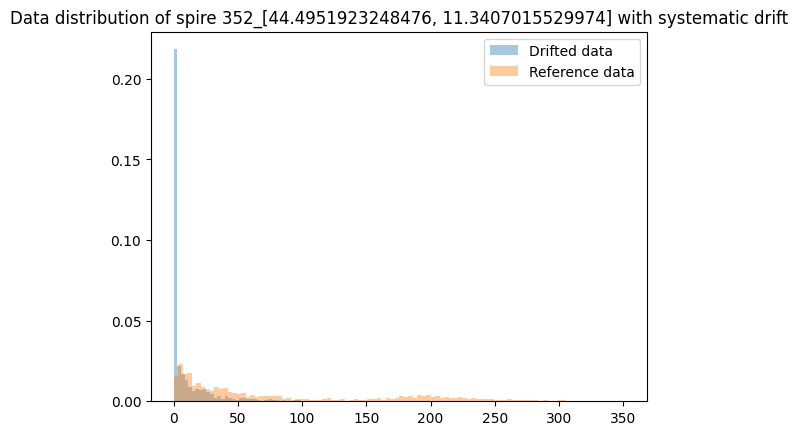

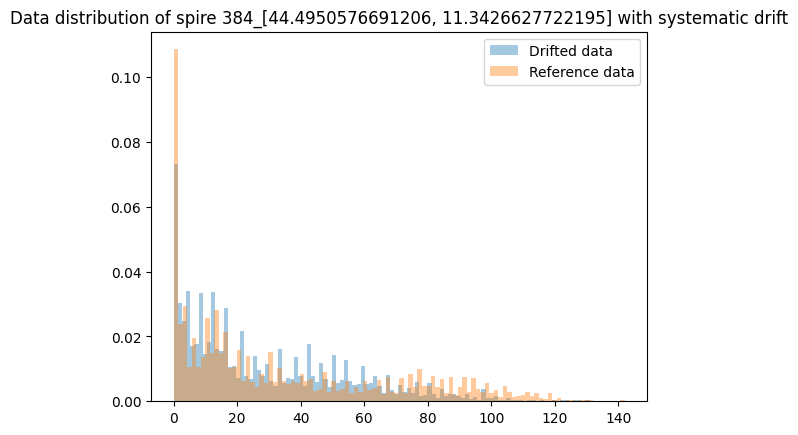

In [62]:
#show data distributiion when a drift is detected

import matplotlib.pyplot as plt
import os
data_spire_folder = "sensor_manager/spire/"

#read data from the folder

spire_code = 383

#get his neighbors

with open(f"{data_manager_folder}output_{spire_code}.txt", "r") as f:
    lines = f.readlines()

neighbors = [i.split("'")[0] for i in lines[0].split("/") if i[0].isdigit()]


for file in os.listdir(data_spire_folder):

    if file not in neighbors:
        continue

    for file_in in os.listdir(data_spire_folder+file):
        #if file in starts with localdrift, then print his distribution with the corresponding reference distribution
        # if "localdrift" in file_in:
        #     #get reference number
        #     reference = file_in.split("_")[2][:-4]

        #     reference_file = "reference_"+reference+".csv"           

        #     #read data

        #     data_drifted = pd.read_csv(data_spire_folder+file+"/"+file_in)
        #     reference_data = pd.read_csv(data_spire_folder+file+"/"+reference_file)

        #     #plot data

        #     plt.figure()

        #     plt.title(f"Data distribution of spire {file} with local drift")

        #     plt.hist(data_drifted, bins=100, alpha=0.4, label="Drifted data", density=True)
        #     plt.hist(reference_data, bins=100, alpha=0.4, label="Reference data", density=True)

        #     plt.legend(loc='upper right')

        #     plt.show()
        if "systematicdrift" in file_in:
            #get reference number
            reference = int(file_in.split("_")[2][:-4])
            reference = str(reference-1)

            reference_file = "reference_"+reference+".csv"           

            #read data

            data_drifted = pd.read_csv(data_spire_folder+file+"/"+file_in)
            reference_data = pd.read_csv(data_spire_folder+file+"/"+reference_file)

            #plot data

            plt.figure()

            plt.title(f"Data distribution of spire {file} with systematic drift")

            plt.hist(data_drifted, bins=100, alpha=0.4, label="Drifted data", density=True)
            plt.hist(reference_data, bins=100, alpha=0.4, label="Reference data", density=True)

            plt.legend(loc='upper right')

            plt.show()





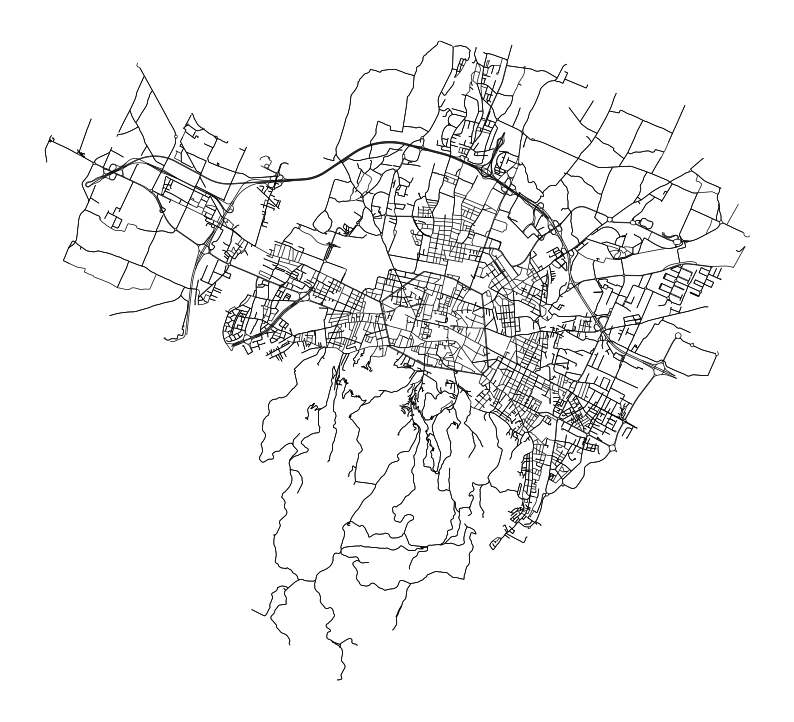

In [1]:
import osmnx as ox
import matplotlib.pyplot as plt

# Download the road network of a place (e.g., Bologna, Italy)
G = ox.graph_from_place("Bologna, Italy", network_type="drive")

# Convert graph to GeoDataFrame
nodes, edges = ox.graph_to_gdfs(G)

# Plot only the edges (roads), black lines on white background
fig, ax = plt.subplots(figsize=(10, 10))
edges.plot(ax=ax, linewidth=0.5, color='black')

# Get sensor positions (ensure list_keys and df are available from previous cells)
# Assuming 'list_keys' and 'df' are defined and populated as in cell with id 'c9fb76ee'
sensor_nodes_gdf = None
if 'list_keys' in globals() and 'df' in globals():
    sensor_geometries = []
    for key in list_keys:
        spire_key_data = df[df["chiave"] == key]
        if not spire_key_data.empty:
            position_str = spire_key_data["geopoint"].values[0]
            lat, lon = map(float, position_str.split(","))
            # Plot sensor locations
            ax.scatter(lon, lat, c='red', s=50, zorder=5, label='Sensors' if key == list_keys[0] else "") # Plotting lon, lat

ax.set_axis_off()

# Add legend if sensors were plotted
if 'list_keys' in globals() and 'df' in globals() and list_keys:
    ax.legend()

# Save to file
plt.savefig("bologna_roads_with_sensors.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
import folium
import matplotlib.pyplot as plt

label_attack = "no_attack"

zoom_start = 15

tiles = "CartoDB positronnolabels" 
m = folium.Map(location=[44.49381, 11.33875], zoom_start=zoom_start, tiles=tiles)

period =1 

data_manager_folder = "sensor_manager/manager_data/"

data = []
positions = []


#get range of ks_statistics values
for spire in list_keys:
    position = df[df["chiave"] == spire]["geopoint"].values[0]
    position = [float(i) for i in position.split(",")]

    #read file
    with open(f"{data_manager_folder}output_{spire}.txt", "r") as f:
        lines = f.readlines()

    if len(lines) <= period:
        continue
    line = lines[period]

    try:
        ks_statistics = float(line.split("ks_statistics =")[-1].split(",")[0])

        data.append([position[0],position[1],ks_statistics])
        positions.append(position)
        
    except:
        pass

#create a grid of the map where each ks_statistic is influencing the color based on distance

# granularity = 100
# border_lat = 0.005
# border_lon = 0.005

# min_lat = min([i[0] for i in positions])- border_lat
# max_lat = max([i[0] for i in positions])+ border_lat

# min_lon = min([i[1] for i in positions])- border_lon
# max_lon = max([i[1] for i in positions])+ border_lon

# lat_range = max_lat - min_lat
# lon_range = max_lon - min_lon

# lat_step = lat_range/granularity
# lon_step = lon_range/granularity

# cmap = plt.get_cmap("plasma")

# data_heatmap = []

# for i in range(granularity):
#     for j in range(granularity):
#         lat = min_lat + i*lat_step
#         lon = min_lon + j*lon_step

#         ks_statistic = 0
#         for k in range(len(data)):
#             ks_statistic += data[k][2]*np.exp(-get_distance(lat, lon, data[k][0], data[k][1])*1e3/200)

#         data_heatmap.append([lat, lon, ks_statistic])


# #normalize data_heatmap ks_statistic values
# data_heatmap = np.array(data_heatmap)
# data_heatmap[:,2] = (data_heatmap[:,2] - data_heatmap[:,2].min())/(data_heatmap[:,2].max() - data_heatmap[:,2].min())

# for i in range(len(data_heatmap)):
#     lat = data_heatmap[i][0]
#     lon = data_heatmap[i][1]
#     ks_statistic = data_heatmap[i][2]

#     color = cmap(ks_statistic)
#     color = f"#{int(color[0]*255):02x}{int(color[1]*255):02x}{int(color[2]*255):02x}"

#     #make a trasparent square
#     folium.Rectangle(
#         bounds=[[lat, lon], [lat+lat_step, lon+lon_step]],
#         color=color,
#         fill=True,
#         fill_color=color,
#         fill_opacity=0.6,
#         weight=0
#     ).add_to(m)



for spire in list_keys:

    #get spire position
    position = df[df["chiave"] == spire]["geopoint"].values[0]
    position = [float(i) for i in position.split(",")]

    #read file
    with open(f"{data_manager_folder}output_{spire}.txt", "r") as f:
        lines = f.readlines()

    #sign sintetic attacks
    # if period == 2:
    #     df_attacks = pd.read_csv("sensor_manager/sintetic_data/attacks.csv", names=["spire", "attack"])

    #     #find row of the spire
    #     row = df_attacks[df_attacks["spire"] == spire]
    #     if row["attack"].values[0] == 1:
    #         #draw a red full circle
    #         folium.CircleMarker(
    #             location=position,
    #             radius=10,
    #             color="red",
    #             fill=True,
    #             fill_color="red",
    #             fill_opacity=0.6
    #         ).add_to(m)
            

    if len(lines) <= period:
        continue
    line = lines[period]

    if "No" in line:

        folium.Marker(
            location=position,
            icon=folium.Icon(color='blue', icon='4')
        ).add_to(m)

    if "Local" in line:
        folium.Marker(
            location=position,
            icon=folium.Icon(color='orange', icon='4')     
        ).add_to(m)
        

    if "Systematic" in line:

        folium.Marker(
            location=position,
            icon=folium.Icon(color='black', icon='4')
        ).add_to(m)


    #write the number
    folium.Marker(
        location=position,
        icon = folium.DivIcon(
            icon_size=(150,36),
            icon_anchor=(7,20),
            html=f'<div style="font-size: 9pt; color: red">{spire}</div>',
            )
        ).add_to(m)
    
#add closed streets
# streets = [[[44.49583434517363, 11.337101087204356],[44.4955282852295, 11.338646073550768]],
#            [[44.50128317182903, 11.344482724599457],[44.50419119838305, 11.345341258692967]],
#            ]
    
# for street in streets:
#     folium.PolyLine(street, color="red", weight=10).add_to(m)


# export map

m.save("sensor_manager/map.html")


from selenium import webdriver
import os
import time

options = webdriver.ChromeOptions()
options.add_argument("--headless")
options.add_argument("--window-size=900,900")


# Start WebDriver
driver = webdriver.Chrome(options=options)
driver.get("file://"+os.getcwd()+"/sensor_manager/map.html")
time.sleep(5)
driver.save_screenshot("sensor_manager/map.png")
driver.quit()


# #cut the image to remove left and down sides

from PIL import Image

img = Image.open("sensor_manager/map.png")

width, height = img.size

zoom = zoom_start

#crop the image so that the previous grid is visible


cut = 100

difference = width - height

left = cut + 70   # Crop pixels from the left
top = 0  # No cropping from the top
right = width - 30  #make it a square 
bottom = height - cut  # Crop 20 pixels from the bottom

# Crop the image
cropped_image = img.crop((left, top, right, bottom))


cropped_image.save(f"sensor_manager/map_{period}_{label_attack}.png")
# cropped_image.save(f"sensor_manager/map_{period}.png")

#delete map.html and map.png

os.remove("sensor_manager/map.html")
os.remove("sensor_manager/map.png")


m

ValueError: Token is required for this provider, but not provided. You can either update TileProvider or pass respective keywords to build_url().

In [98]:
#add attacks to the spire sensors

import os 
import pandas as pd
import numpy as np

#set seed for reproducibility
np.random.seed(42)

#read multiple files in the same dataframe

files = os.listdir("./sensor_manager/sensor_data")

reference_length = 30*24*8 #X months of data
attack_length = 30*24*4 #X months of attack

percentage_of_attack = 0.5

spires_attacks = pd.DataFrame(columns=["spire", "attack"])

number_attacks = int(len(files)*percentage_of_attack)

#scuffle the files and attack the selected number
indeces = np.random.choice(range(len(files)), size=len(files), replace=False)

attacked_spires = []

for j,i in enumerate(indeces.tolist()):
    file = files[i]
    spire_number = file.split("_")[1]
    spire_position = file.split("_")[2][:-4]
    df_origin = pd.read_csv(f"./sensor_manager/sensor_data/{file}").values

    mean_values = np.mean(df_origin)

    attack = 0

    #change the mean values of the columm for the attack period
    if j < number_attacks:
        #attack first period
        df_origin[reference_length:reference_length+attack_length] = df_origin[reference_length:+reference_length+attack_length] + mean_values + 5
        attack = 1
        attacked_spires.append(spire_number)

    #save new data to sintetic_data folder
    pd.DataFrame(df_origin).to_csv(f"./sensor_manager/sintetic_data/spire_{spire_number}_{spire_position}.csv", index=False, header=False)

    #labels
    spires_attack = pd.DataFrame({"spire": [spire_number], "attack": [attack]})
    spires_attacks = pd.concat([spires_attacks, spires_attack], axis=0)

spires_attacks.to_csv("./sensor_manager/sintetic_data/attacks.csv", index=False, header=False)

print(attacked_spires)


['12', '370', '358', '356', '365', '352', '378', '349', '815', '380', '384', '368', '355', '14', '277', '369', '15', '375', '389', '21', '364', '385', '5', '2', '344', '347', '10', '359', '9', '360', '817', '390', '19']


In [ ]:
import numpy as np
import math

#get geopoints

list_geopoints = []

for file in os.listdir(f"{home}/tiniMLVM/sensor_manager/sensor_data"):
    if "spire" in file:
        position = file.split("_")[-1].replace(".csv", "")
        lat1, lon1 = float(position.split(",")[0][1:]), float(position.split(",")[1][:-1])
        list_geopoints.append((lat1, lon1))


def get_distance(lat1, lon1, lat2, lon2):
    r = 6371  # Radius of the earth in km

    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = r * c  # Distance in km
    return distance

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the Earth (specified in decimal degrees)
    """
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1  # Difference in latitude
    dlon = lon2 - lon1  # Difference in longitude
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.asin(math.sqrt(a))
    
    # Radius of Earth in kilometers (can be changed to 3958.8 for miles)
    r = 6371  # Radius of Earth in km
    distance = r * c  # Distance in km
    return distance


for i in range(len(list_geopoints)):
    for j in range(i + 1, len(list_geopoints)):
        distance = get_distance(list_geopoints[i][0], list_geopoints[i][1], list_geopoints[j][0], list_geopoints[j][1])
        print(f"Distance between {list_geopoints[i]} and {list_geopoints[j]} is {distance} km")

Distance between (44.4901162203284, 11.3398356513878) and (44.4985349106485, 11.3541657967424) is 1.4724961270775772 km
Distance between (44.4901162203284, 11.3398356513878) and (44.4985349106485, 11.3541657967424) is 1.4724961270775772 km


2025-03-03 16:45:40.040949: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-03 16:45:40.863059: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-03 16:45:41.690302: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741020342.300440 1157974 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741020342.440862 1157974 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-03 16:45:43.816469: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Epoch 1/100


2025-03-03 16:45:49.804285: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/lucaserf/tiniMLVM/experiments_venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0099 - val_loss: 0.0110
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0068 - val_loss: 0.0096
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0056 - val_loss: 0.0085
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0055 - val_loss: 0.0086
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0057 - val_loss: 0.0084
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0054 - val_loss: 0.0084
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0053 - val_loss: 0.0084
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0059 - val_loss: 0.0084
Epoch 9/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0057 - val_loss: 0.0084
Epoch 10/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0056 - val_loss: 0.0084
Epoch 10: early stopping
Restoring model weights from the end of the best epoch: 5.
Training time: 24.54288935661316


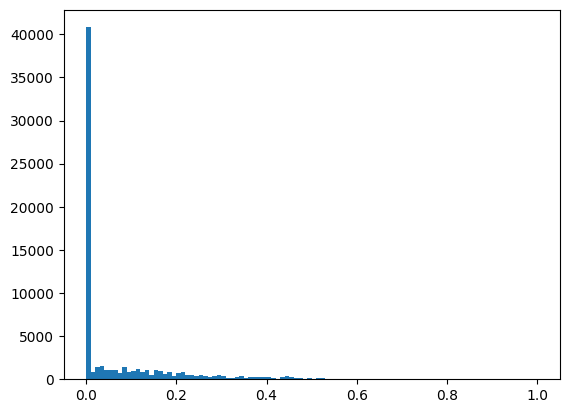

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0052
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


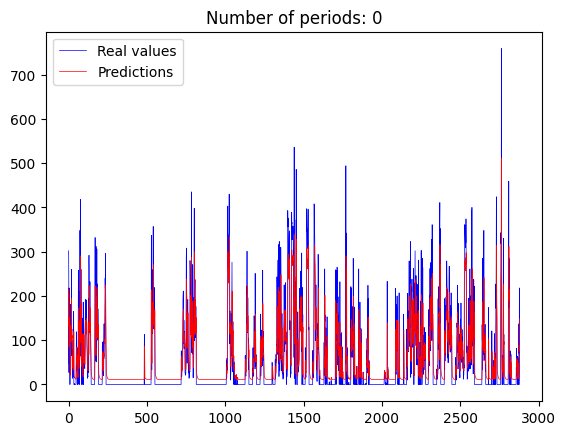

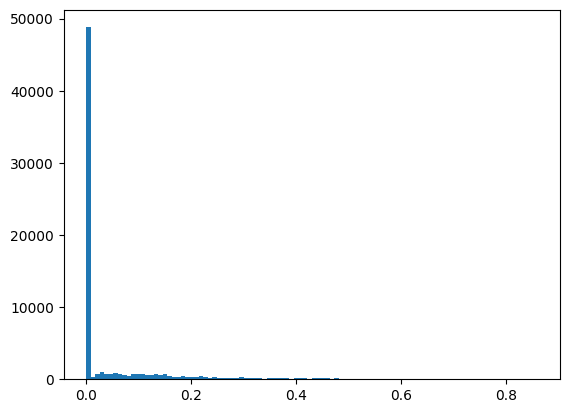

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0055
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


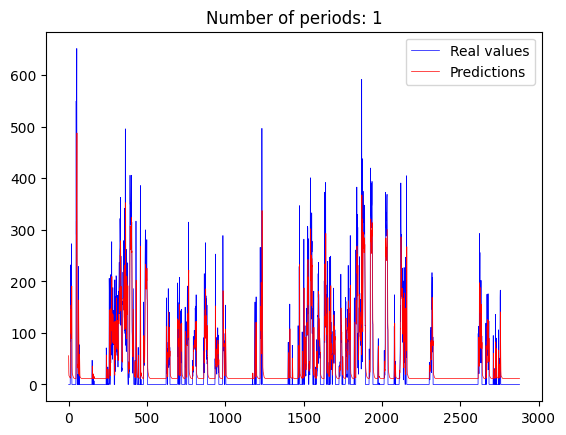

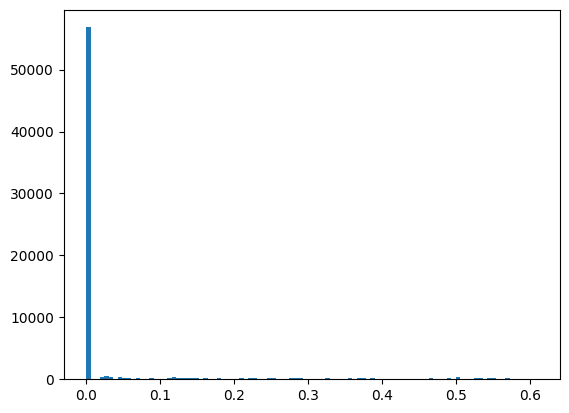

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 8.3664e-04
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


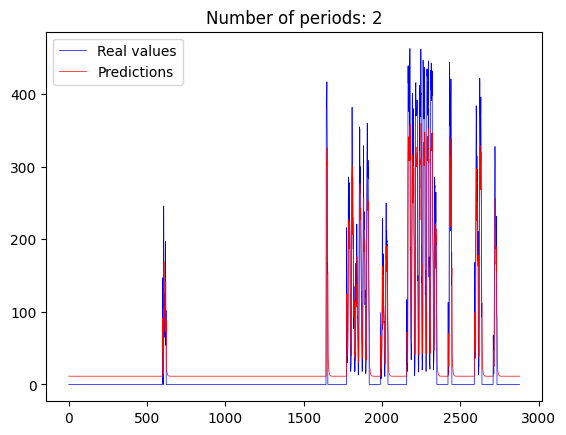

[np.float64(35.24958014024629), np.float64(28.741441916094885), np.float64(20.360750691758263)]
[np.float64(10.644280412870144), np.float64(11.477323405787244), np.float64(10.100995306164242)]


In [102]:
#check if the model reduces his accuracy in time
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import time 

#load the dataset

# systematic drift second round (going to 0)
# df_test = pd.read_csv("./sensor_manager/sensor_data/spire_352_[44.4951923248476, 11.3407015529974].csv")

# systematic drift second round (change in shape) (drifting more on the non drifting round)
# df_test = pd.read_csv("./sensor_manager/sensor_data/spire_386_[44.4948279343394, 11.3427806045619].csv")

# local drift first round, systematic drift second round (bigger drift on the second round that was a systematic drift)
# df_test = pd.read_csv("./sensor_manager/sensor_data/spire_375_[44.5014009848541, 11.3445247412256].csv")

# neighbor of 375, systematic drift on second round (absolute increases, relative decreases, it is just related to amplitude)
# df_test = pd.read_csv("./sensor_manager/sensor_data/spire_373_[44.5013160433798, 11.3441847244287].csv")

df_test = pd.read_csv("./sensor_manager/sensor_data/spire_12_[44.4992331807033, 11.3385147346639].csv")


#train the model

X_data = []
y_data = []

previous_values = 24
next_values = 1

for i in range(previous_values, len(df_test)-next_values):
    X_data.append(df_test.iloc[i - previous_values:i, 0].values)
    y_data.append(df_test.iloc[i: i+next_values, 0].values)

X_data, y_data = np.array(X_data), np.array(y_data)

#normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))

X_data = scaler.fit_transform(X_data)
y_data = scaler.fit_transform(y_data)

months_errors = []
months_relative_errors = [] 

train_time_period = 24*30*4
validation_time_period = 24*30*1

X_train = X_data[:train_time_period]
y_train = y_data[:train_time_period]

X_val = X_data[train_time_period:train_time_period+validation_time_period]
y_val = y_data[train_time_period:train_time_period+validation_time_period]

X_test = X_data[train_time_period:]
y_test = y_data[train_time_period:]


X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))


#define callbacks for early stopping with validation loss

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        verbose=1,
        restore_best_weights=True
    )
]


model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(previous_values,1), return_sequences=True),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(next_values)
])

model.compile(optimizer='adam', loss='mean_squared_error')

#train the model using cross validation
t = time.time()
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=callbacks)

print(f"Training time: {time.time()-t}")
#evaluate the model on periods of data used for drift detection

divisions = 2

for i in range(divisions+1):

    X_test = X_data[train_time_period*i:train_time_period*(i+1)]
    y_test = y_data[train_time_period*i:train_time_period*(i+1)]

    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    #print histogram of X_test

    plt.hist(X_test.flatten(), bins=100)
    plt.show()

    

    model.evaluate(X_test, y_test)

    #show the predictions on the test set

    predictions = model.predict(X_test)

    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test)

    #make the predictions a single array
    predictions = np.reshape(predictions, (predictions.shape[0]*predictions.shape[1], 1))
    y_test = np.reshape(y_test, (y_test.shape[0]*y_test.shape[1], 1))

    #get magnitude of the errors
    errors = np.abs(predictions - y_test)

    #get relative error
    relative_errors = errors/(y_test+1)

    error = np.mean(errors)
    relative_error = np.mean(relative_errors)

    months_errors.append(error)
    months_relative_errors.append(relative_error)


    plt.plot(y_test, color='blue', label='Real values', linewidth=0.5)

    plt.plot(predictions, color='red', label='Predictions', linewidth=0.5)

    plt.legend()
    plt.title(f"Number of periods: {i}")

    plt.show()

print(months_errors)
print(months_relative_errors)

2025-01-14 14:50:18.223108: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-14 14:50:18.227794: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-14 14:50:18.239221: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736866218.256322 2072175 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736866218.261301 2072175 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-14 14:50:18.280886: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Epoch 1/100


2025-01-14 14:50:20.932679: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/lucaserf/tiniMLVM/experiments_venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0579 - val_loss: 0.0252
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0315 - val_loss: 0.0230
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0239 - val_loss: 0.0227
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0247 - val_loss: 0.0196
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0211 - val_loss: 0.0178
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0170 - val_loss: 0.0173
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0168 - val_loss: 0.0129
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0135 - val_loss: 0.0139
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0170 - val_loss: 0.0146
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0133 - val_loss: 0.0125
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0116 - val_loss: 0.0138
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0140 - val_loss: 0.0132
E

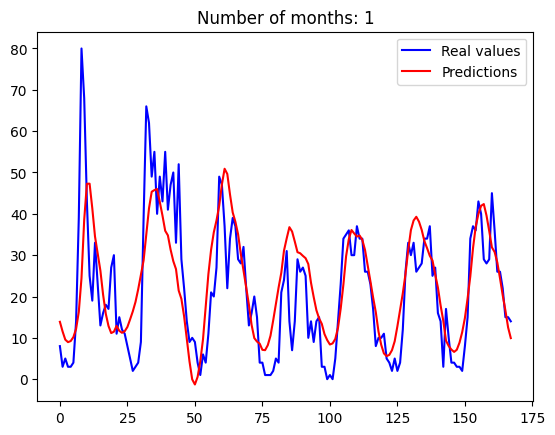

Epoch 1/100


/home/lucaserf/tiniMLVM/experiments_venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0579 - val_loss: 0.0226
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0329 - val_loss: 0.0190
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0261 - val_loss: 0.0147
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0186 - val_loss: 0.0131
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0175 - val_loss: 0.0161
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0175 - val_loss: 0.0128
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0163 - val_loss: 0.0115
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0145 - val_loss: 0.0115
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0157 - val_loss: 0.0120
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0152 - val_loss: 0.0114
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0121 - val_loss: 0.0115
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0

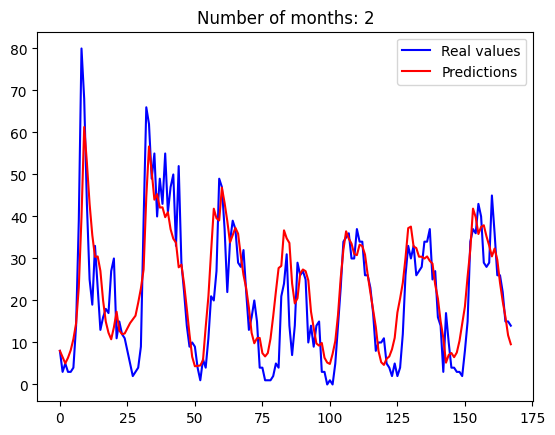

Epoch 1/100


/home/lucaserf/tiniMLVM/experiments_venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0487 - val_loss: 0.0203
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0262 - val_loss: 0.0135
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0184 - val_loss: 0.0120
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0171 - val_loss: 0.0118
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0143 - val_loss: 0.0115
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0148 - val_loss: 0.0109
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0143 - val_loss: 0.0106
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0122 - val_loss: 0.0093
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0116 - val_loss: 0.0090
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0111 - val_loss: 0.0088
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0093 - val_loss: 0.0077
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0

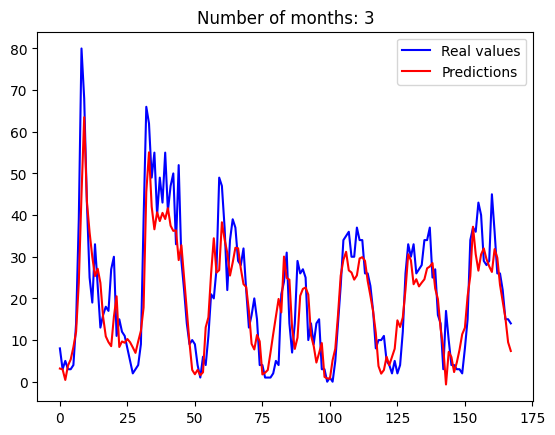

Epoch 1/100


/home/lucaserf/tiniMLVM/experiments_venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0457 - val_loss: 0.0193
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0225 - val_loss: 0.0147
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0176 - val_loss: 0.0124
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0142 - val_loss: 0.0110
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0124 - val_loss: 0.0118
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0118 - val_loss: 0.0095
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0112 - val_loss: 0.0086
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0105 - val_loss: 0.0089
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0099 - val_loss: 0.0078
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0085 - val_loss: 0.0075
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0088 - val_loss: 0.0070
Epoch 12/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0

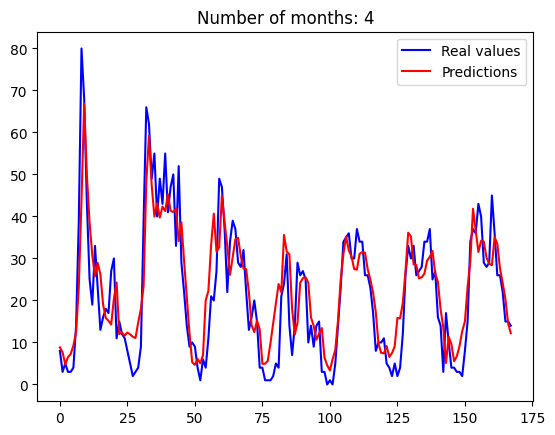

Epoch 1/100


/home/lucaserf/tiniMLVM/experiments_venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0428 - val_loss: 0.0198
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0211 - val_loss: 0.0147
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0167 - val_loss: 0.0115
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0158 - val_loss: 0.0114
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0127 - val_loss: 0.0098
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0118 - val_loss: 0.0095
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0115 - val_loss: 0.0091
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0092 - val_loss: 0.0088
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0105 - val_loss: 0.0091
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0099 - val_loss: 0.0073
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0081 - val_loss: 0.0061
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0

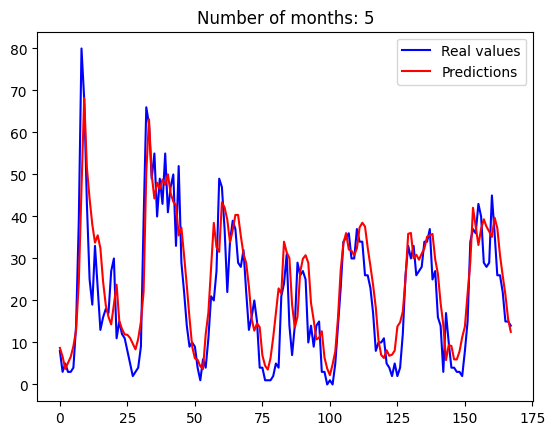

Epoch 1/100


/home/lucaserf/tiniMLVM/experiments_venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0344 - val_loss: 0.0151
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0151 - val_loss: 0.0113
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0128 - val_loss: 0.0108
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0115 - val_loss: 0.0100
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0109 - val_loss: 0.0089
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0102 - val_loss: 0.0081
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0077 - val_loss: 0.0067
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0092 - val_loss: 0.0071
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0093 - val_loss: 0.0062
Epoch 10/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0071 - val_loss: 0.0058
Epoch 11/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0064 - val_loss: 0.0066
Epoch 12/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0

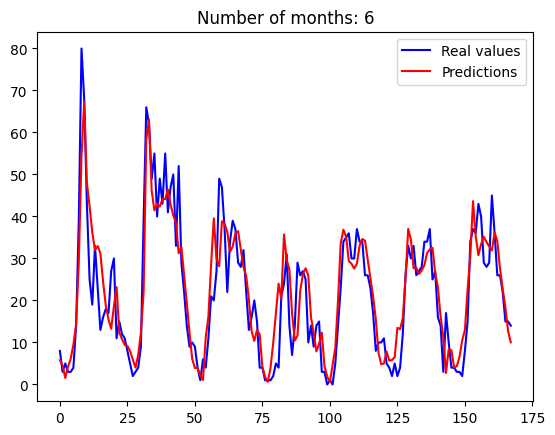

Epoch 1/100


/home/lucaserf/tiniMLVM/experiments_venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0448 - val_loss: 0.0133
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0167 - val_loss: 0.0113
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0149 - val_loss: 0.0099
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0118 - val_loss: 0.0099
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0134 - val_loss: 0.0087
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0098 - val_loss: 0.0064
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0094 - val_loss: 0.0075
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0079 - val_loss: 0.0063
Epoch 9/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0073 - val_loss: 0.0059
Epoch 10/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0072 - val_loss: 0.0064
Epoch 11/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0075 - val_loss: 0.0053
Epoch 12/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0

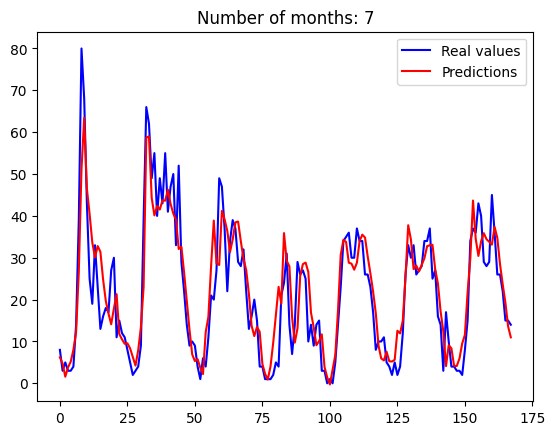

Epoch 1/100


/home/lucaserf/tiniMLVM/experiments_venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0408 - val_loss: 0.0169
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0163 - val_loss: 0.0112
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0148 - val_loss: 0.0115
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0121 - val_loss: 0.0091
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0111 - val_loss: 0.0081
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0094 - val_loss: 0.0062
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0080 - val_loss: 0.0061
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0081 - val_loss: 0.0061
Epoch 9/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0080 - val_loss: 0.0061
Epoch 10/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0073 - val_loss: 0.0060
Epoch 11/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0069 - val_loss: 0.0053
Epoch 12/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0

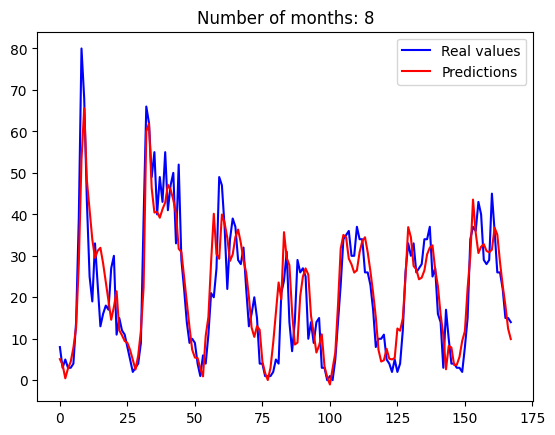

Epoch 1/100


/home/lucaserf/tiniMLVM/experiments_venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0431 - val_loss: 0.0125
Epoch 2/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0157 - val_loss: 0.0100
Epoch 3/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0148 - val_loss: 0.0103
Epoch 4/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0117 - val_loss: 0.0082
Epoch 5/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0109 - val_loss: 0.0066
Epoch 6/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0091 - val_loss: 0.0060
Epoch 7/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0083 - val_loss: 0.0060
Epoch 8/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0077 - val_loss: 0.0057
Epoch 9/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0071 - val_loss: 0.0053
Epoch 10/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0068 - val_loss: 0.0061
Epoch 11/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0074 - val_loss: 0.0066
Epoch 12/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0

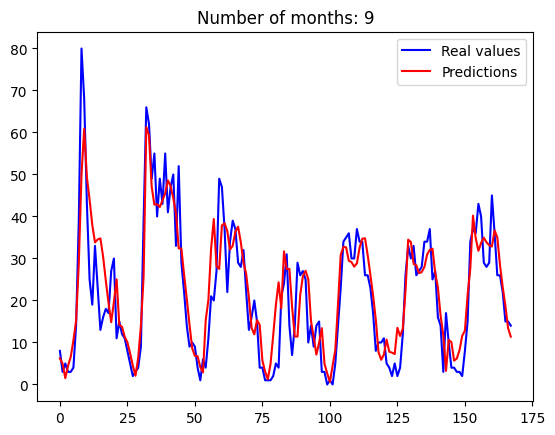

Epoch 1/100


/home/lucaserf/tiniMLVM/experiments_venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0337 - val_loss: 0.0121
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0161 - val_loss: 0.0097
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0131 - val_loss: 0.0091
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0110 - val_loss: 0.0083
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0101 - val_loss: 0.0061
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0082 - val_loss: 0.0066
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0070 - val_loss: 0.0054
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0075 - val_loss: 0.0058
Epoch 9/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0074 - val_loss: 0.0054
Epoch 10/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0069 - val_loss: 0.0053
Epoch 11/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0061 - val_loss: 0.0056
Epoch 12/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0

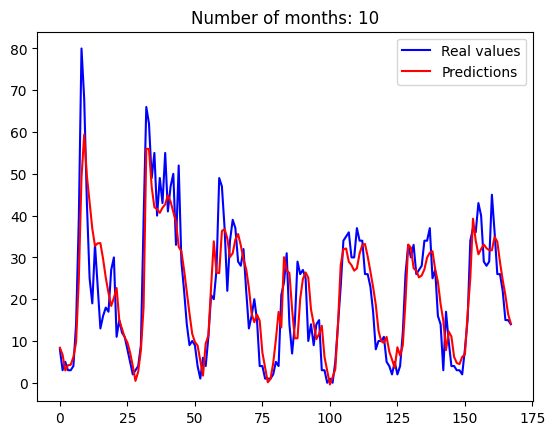

Epoch 1/100


/home/lucaserf/tiniMLVM/experiments_venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0293 - val_loss: 0.0134
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0150 - val_loss: 0.0092
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0117 - val_loss: 0.0093
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0106 - val_loss: 0.0063
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0083 - val_loss: 0.0062
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0083 - val_loss: 0.0055
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0079 - val_loss: 0.0058
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0068 - val_loss: 0.0057
Epoch 9/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0070 - val_loss: 0.0055
Epoch 10/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0063 - val_loss: 0.0049
Epoch 11/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0059 - val_loss: 0.0058
Epoch 12/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0

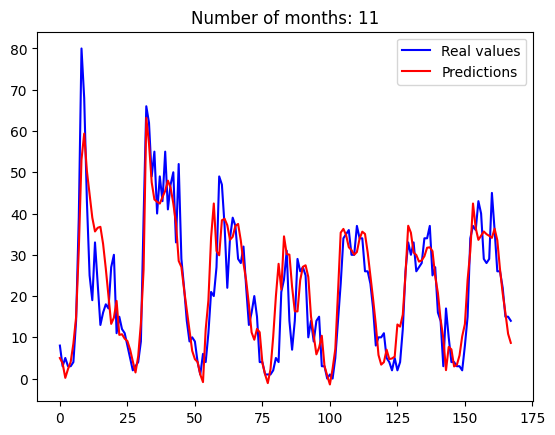

Epoch 1/100


/home/lucaserf/tiniMLVM/experiments_venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0347 - val_loss: 0.0120
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0144 - val_loss: 0.0098
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0115 - val_loss: 0.0077
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0096 - val_loss: 0.0067
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0077 - val_loss: 0.0062
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0074 - val_loss: 0.0061
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0076 - val_loss: 0.0050
Epoch 8/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0070 - val_loss: 0.0052
Epoch 9/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0071 - val_loss: 0.0054
Epoch 10/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0066 - val_loss: 0.0058
Epoch 10: early stopping
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0072
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


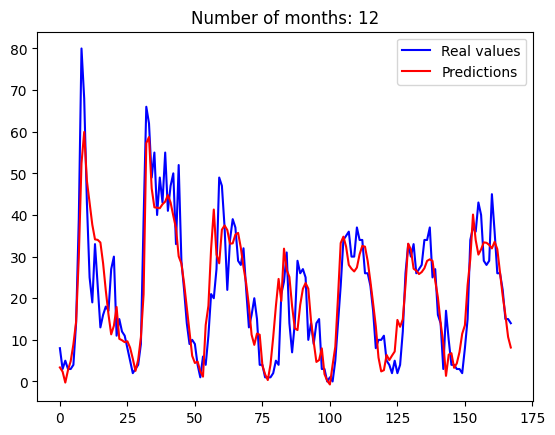

Epoch 1/100


/home/lucaserf/tiniMLVM/experiments_venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0311 - val_loss: 0.0139
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0141 - val_loss: 0.0091
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0126 - val_loss: 0.0068
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0091 - val_loss: 0.0055
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0075 - val_loss: 0.0056
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0075 - val_loss: 0.0053
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0067 - val_loss: 0.0054
Epoch 8/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0063 - val_loss: 0.0052
Epoch 9/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0064 - val_loss: 0.0050
Epoch 10/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0058 - val_loss: 0.0050
Epoch 11/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0062 - val_loss: 0.0050
Epoch 12/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0

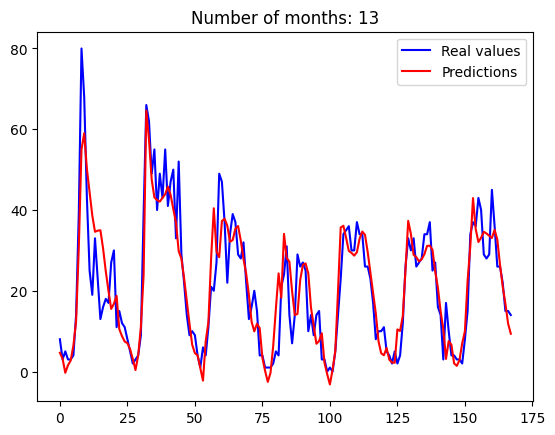

Epoch 1/100


/home/lucaserf/tiniMLVM/experiments_venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0327 - val_loss: 0.0113
Epoch 2/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0166 - val_loss: 0.0093
Epoch 3/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0105 - val_loss: 0.0071
Epoch 4/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0088 - val_loss: 0.0058
Epoch 5/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0078 - val_loss: 0.0059
Epoch 6/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0079 - val_loss: 0.0057
Epoch 7/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0068 - val_loss: 0.0053
Epoch 8/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0062 - val_loss: 0.0062
Epoch 9/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0063 - val_loss: 0.0058
Epoch 10/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0058 - val_loss: 0.0053
Epoch 11/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0059 - val_loss: 0.0051
Epoch 12/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 

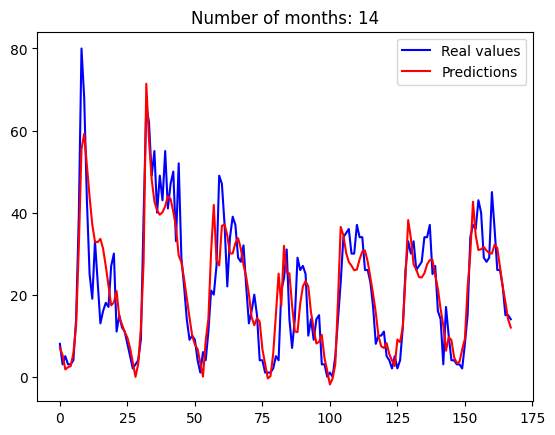

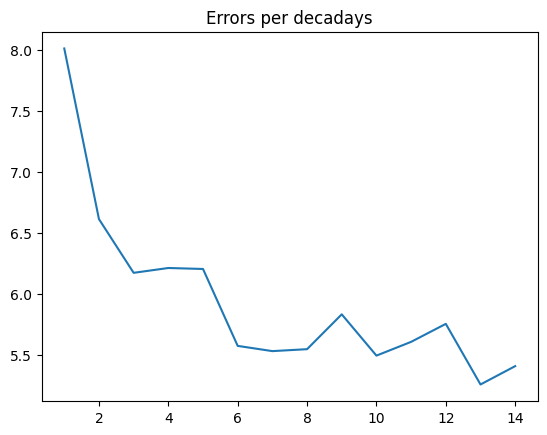

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#load the dataset

df = pd.read_csv("./sensor_data/spire_1_[44.4985349106485, 11.3541657967424].csv")

#train the model

X_data = []
y_data = []

previous_values = 24

for i in range(previous_values, len(df)):
    X_data.append(df.iloc[i - previous_values:i, 0].values)
    y_data.append(df.iloc[i, 0])

X_data, y_data = np.array(X_data), np.array(y_data)

#normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))

X_data = scaler.fit_transform(X_data)
y_data = scaler.fit_transform(y_data.reshape(-1, 1))

months_errors = []

for i in range(1,15):
    period = i*10

    #take the last week for testing
    X_test = X_data[-24*7:]
    y_test = y_data[-24*7:]

    #shift the data of 3 months to offset the recency
    shift = 24*3*30

    #select the previous months before the test set
    X_train = X_data[-period*24 - 24*7- shift:-24*7 - shift]
    y_train = y_data[-period*24 - 24*7- shift:-24*7- shift]

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


    #define callbacks for early stopping with validation loss

    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            verbose=1
        )
    ]


    model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(128, input_shape=(previous_values,1), return_sequences=True),
        tf.keras.layers.LSTM(128),
        tf.keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')

    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=callbacks)

    model.evaluate(X_test, y_test)

    #show the predictions on the test set

    predictions = model.predict(X_test)

    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test)

    #get magnitude of the errors

    errors = np.abs(predictions - y_test)

    error = np.mean(errors)

    months_errors.append(error)

    plt.plot(y_test, color='blue', label='Real values')

    plt.plot(predictions, color='red', label='Predictions')

    plt.legend()
    plt.title(f"Number of months: {i}")

    plt.show()

#set integer values for the months

plt.plot([i for i in range(1, 15)], months_errors)
plt.title("Errors per decadays")

plt.savefig("./errors_per_decadays.png")




In [40]:
#print distributions

import os
import pandas as pd
import matplotlib.pyplot as plt

path0 = "./sensor_manager/spire/6_[44.4895074220971, 11.3433581064329]/reference_0.csv"

path1 = "./sensor_manager/spire/6_[44.4895074220971, 11.3433581064329]/reference_1.csv"

df0 = pd.read_csv(path0)
df1 = pd.read_csv(path1)




plt.hist(df0, bins=50, alpha=0.5, label='Reference 0')
plt.hist(df1, bins=50, alpha=0.5, label='Reference 1')

plt.legend()
plt.title("Distributions of the values of the sensor")

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './sensor_manager/spire/6_[44.4895074220971, 11.3433581064329]/reference_1.csv'

Number of spires: 132
Cost of training in 2 periods periodically: 3300 seconds
Cost of training in 2 periods with drifted spires: 1075 seconds
Cost of training in 2 periods with systematic drifts: 750 seconds
Relative cost of training in 2 periods periodically: 100 %
Relative cost of training in 2 periods with drifted spires: 32 %
Relative cost of training in 2 periods with systematic drifts: 22 %


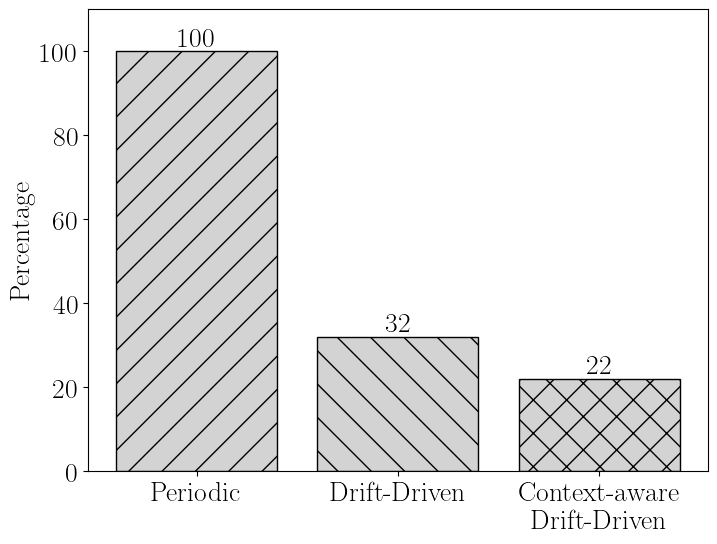

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

#cost calculations

time_training_single_spire_seconds = 25 #seconds

#data 
df_data = pd.read_csv("./sensor_manager/attack_0.csv")

number_spires = len(df_data["spire"])

print(f"Number of spires: {number_spires}")

#cost of training periodically in 2 periods

cost_training_periodic = time_training_single_spire_seconds*number_spires

print(f"Cost of training in 2 periods periodically: {cost_training_periodic} seconds")

#drifted_spires

number_drifted_spires = len(df_data[df_data["label"] != "no_drift"])

cost_training_drift = time_training_single_spire_seconds*number_drifted_spires

print(f"Cost of training in 2 periods with drifted spires: {cost_training_drift} seconds")

#systematic drifts

number_systematic_drifts = len(df_data[df_data["label"] == "systematic"])

cost_training_systematic = time_training_single_spire_seconds*number_systematic_drifts

print(f"Cost of training in 2 periods with systematic drifts: {cost_training_systematic} seconds")

#relative costs

relative_cost_training_periodic = int(cost_training_periodic/cost_training_periodic *100)

relative_cost_training_drift = int(cost_training_drift/cost_training_periodic*100)

relative_cost_training_systematic = int(cost_training_systematic/cost_training_periodic*100)

print(f"Relative cost of training in 2 periods periodically: {relative_cost_training_periodic} %")
print(f"Relative cost of training in 2 periods with drifted spires: {relative_cost_training_drift} %")
print(f"Relative cost of training in 2 periods with systematic drifts: {relative_cost_training_systematic} %")

plt.figure(figsize=(8, 6))

#make the bar with different textures instead of colors
textures = ['/', '\\', "x"]
labels = ["Periodic", "Drift-Driven", "Context-aware\nDrift-Driven"]
values = [relative_cost_training_periodic, relative_cost_training_drift, relative_cost_training_systematic]

bars = plt.bar(labels, values)
for i, bar in enumerate(bars):
    bar.set_hatch(textures[i])
    bar.set_color('lightgray')  # Set a base color for the bars
    bar.set_edgecolor('black') # Add edge color for better visibility of hatches

# plt.title("Relative costs of training in 2 periods")
plt.ylabel("Percentage")

#write the values on the bars
for i, v in enumerate(values):
    #use a big font size
    plt.text(i, v , str(v)+ "%", ha='center', va='bottom', color='black', fontweight='bold')

plt.ylim(0, 110)  # Set y-axis limit to ensure all values are visible

plt.savefig("sensor_manager/relative_costs.pdf")


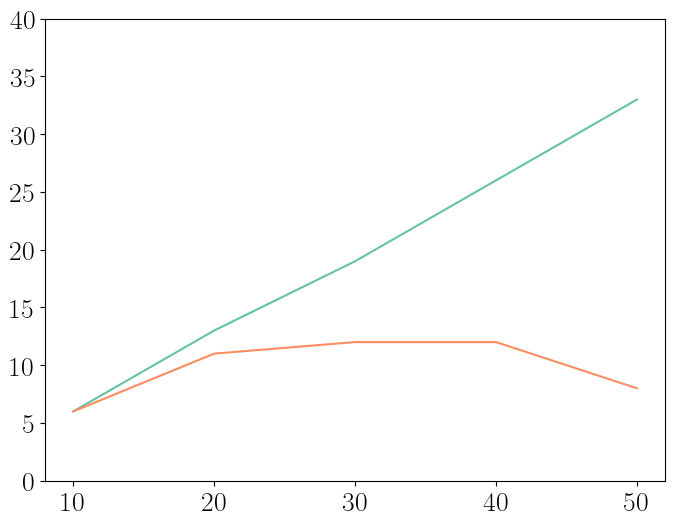

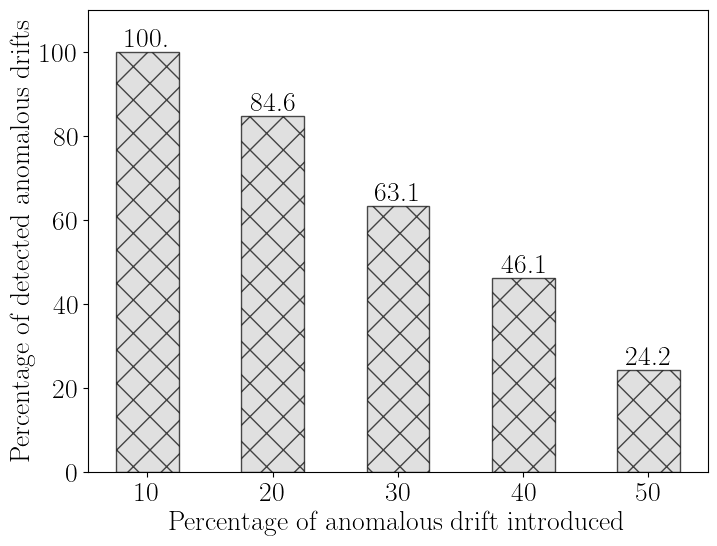

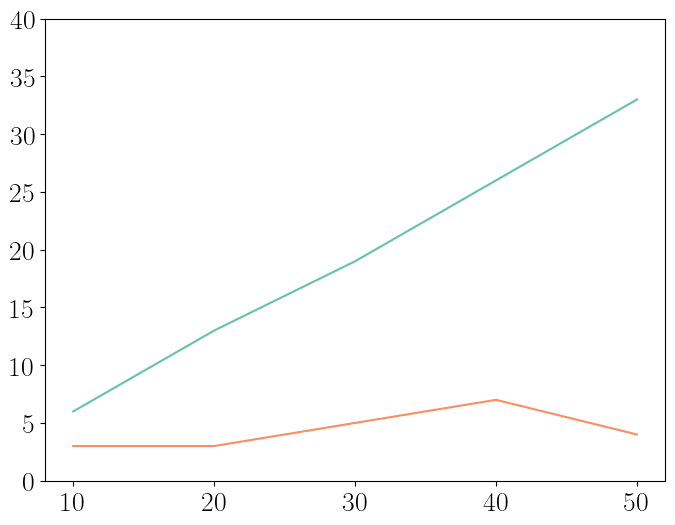

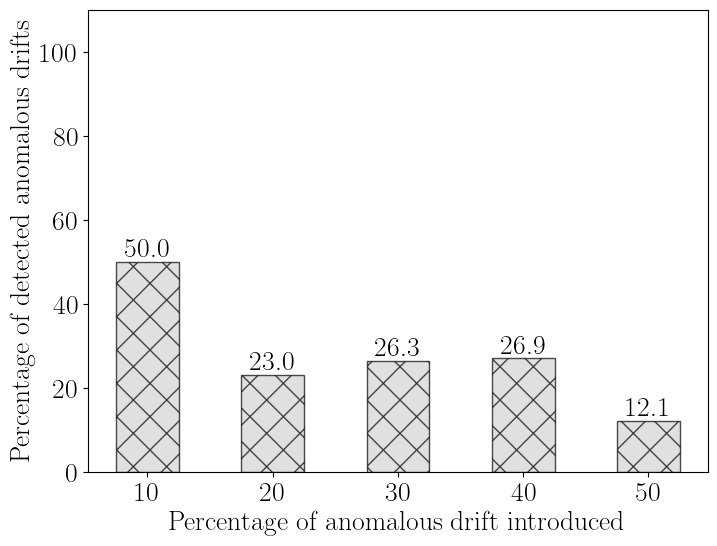

In [11]:
import matplotlib.pyplot as plt

percentage_of_attacks = [10,20,30,40,50]

data_folder = "./sensor_manager/experiments.txt"
with open(data_folder, "r") as f:
    for i in range(2):
        plt.figure(figsize=(8, 6))
        plt.xticks(percentage_of_attacks)
        plt.ylim(0,40)
        total_attacks = []
        detected_attacks = []
        for j in range(5):
            _ = f.readline()
            total_attacks.append(int(f.readline().split(":")[-1]))
            detected_attacks.append(int(f.readline().split(":")[-1]))
            _ = f.readline()
        plt.plot(percentage_of_attacks, total_attacks, label=f"Experiment {i}")
        plt.plot(percentage_of_attacks , detected_attacks, label=f"Experiment {i} detected")

        plt.figure(figsize=(8, 6))
        plt.ylim(0,110)
        # plt.title(f"Percentage of detected attacks in period {i+1}")
        plt.ylabel("Percentage of detected anomalous drifts")
        plt.xlabel("Percentage of anomalous drift introduced")
        plt.xticks(percentage_of_attacks)
        bar_values = [detected_attacks[k]/total_attacks[k]*100 for k in range(len(percentage_of_attacks))]
        bars = plt.bar(percentage_of_attacks, bar_values, alpha=0.7, width=5, edgecolor='black')
        # Apply a single hatch pattern or cycle through a list if desired
        hatch_pattern = 'x' # Example: use a single hatch pattern
        for bar_item in bars:
            bar_item.set_hatch(hatch_pattern)
            bar_item.set_color('lightgray')
            bar_item.set_edgecolor('black')
            
        #write the numbers in the bars
        for k, v_bar in zip(percentage_of_attacks, bar_values):
            plt.text(k, v_bar, str(v_bar)[:4]+ "%", ha='center', va='bottom', color='black', fontweight='bold')
        
        
        plt.savefig(f"sensor_manager/percentage_of_detected_attacks_{i+1}.pdf")


Determined Neighbors (within radius 3.0):
Node 0: [1, 2]
Node 1: [0, 2]
Node 2: [0, 1, 3]
Node 3: [2]


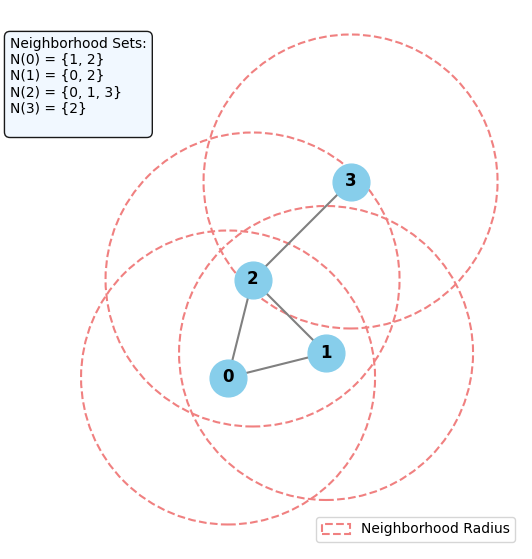

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math

# 1. Define Node Positions
node_positions = {
    0: (1, 1),
    1: (3, 1.5),
    2: (1.5, 3),
    3: (3.5, 5) 
}
# 2. Define Neighborhood Radius
max_distance = 3.0 # Nodes within this distance are neighbors

# --- Calculations ---

# Create a graph
G = nx.Graph()

# Add nodes with their positions
for node, pos in node_positions.items():
    G.add_node(node, pos=pos)

# Dictionary to store neighbors
neighbors = {node: [] for node in G.nodes()}

# 3. Calculate Distances and Determine Neighbors/Edges
node_list = list(G.nodes())
for i in range(len(node_list)):
    for j in range(i + 1, len(node_list)):
        node1 = node_list[i]
        node2 = node_list[j]

        pos1 = G.nodes[node1]['pos']
        pos2 = G.nodes[node2]['pos']

        # Calculate Euclidean distance
        distance = math.sqrt((pos1[0] - pos2[0])**2 + (pos1[1] - pos2[1])**2)

        # 4. Add edge if within max_distance
        if distance <= max_distance:
            G.add_edge(node1, node2, weight=distance)
            neighbors[node1].append(node2)
            neighbors[node2].append(node1)

# Print neighbor list (for verification)
print("Determined Neighbors (within radius {}):".format(max_distance))
for node, node_neighbors in neighbors.items():
    # Sort neighbors for consistent output
    print(f"Node {node}: {sorted(node_neighbors)}")

# --- Visualization ---

# 5. Draw the graph
pos = nx.get_node_attributes(G, 'pos')

# Adjust subplot to make space on the left
fig, ax = plt.subplots(figsize=(8, 7)) # Increased figure width slightly
plt.subplots_adjust(left=0.25) # Increase left margin

# 6. Draw the neighborhood radius circles
for node, position in pos.items():
    circle = patches.Circle(position, max_distance, edgecolor='grey', facecolor='none', linestyle='--', linewidth=1.5, label='Neighborhood Radius' if node==0 else "")
    ax.add_patch(circle)

# 7. Draw the nodes and edges
nx.draw(G, pos, with_labels=True, node_color='darkgrey', node_size=700,
        edge_color='black', width=1.5, font_size=20, font_weight='bold', ax=ax)

# 8. Prepare and Add Neighborhood Text
neighborhood_text = "Neighborhood Sets:\n"
for node in sorted(neighbors.keys()): # Sort nodes for consistent order
    # Format the set string: sort neighbors, convert to string, replace [] with {}
    neighbor_set_str = str(sorted(neighbors[node])).replace('[', '{').replace(']', '}')
    neighborhood_text += f"N({node}) = {neighbor_set_str}\n"

# Add text to the plot using axis coordinates
# (0,1) is top-left corner of the axes area
# x=-0.1 places it slightly to the left of the y-axis
# transform=ax.transAxes means coordinates are relative to the axes bounding box
ax.text(1e-2, 0.95, neighborhood_text,
        transform=ax.transAxes,
        fontsize=20,
        verticalalignment='top', # Align text block top with the coordinate
        horizontalalignment='left', # Align text left edge with the coordinate
        bbox=dict(boxstyle='round,pad=0.4', fc='aliceblue', alpha=0.9)) # Optional background box

# Set plot limits
all_x = [p[0] for p in pos.values()]
all_y = [p[1] for p in pos.values()]
ax.set_xlim(min(all_x) - max_distance - 3, max(all_x) + max_distance + 0.5)
ax.set_ylim(min(all_y) - max_distance - 1.5, max(all_y) + max_distance + 0.5)

ax.set_aspect('equal', adjustable='box')
# ax.set_title("Node Neighborhoods Determination by Distance")
ax.legend(loc='lower right', fontsize = 20)
# plt.xlabel("X-coordinate")
# plt.ylabel("Y-coordinate")
# plt.grid(True, linestyle=':', alpha=0.6)
# plt.show()

# To save the image:
plt.savefig("sensor_manager/neighborhood_example_with_text.pdf", dpi=300, bbox_inches='tight')